In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import KNNImputer

In [4]:
df=pd.read_excel('Customer+Churn+Data.xlsx', sheet_name='Data for DSBA')
df.head(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,120.86,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,122.93,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,126.83,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,122.93,Mobile


In [33]:
df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [34]:
df = df.drop(["AccountID"], axis=1)
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [35]:
df.shape

(11260, 18)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

<AxesSubplot:>

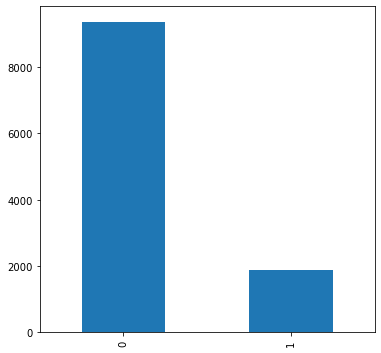

In [37]:
df['Churn'].value_counts().plot(kind='bar',figsize=(6,6))

In [38]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,11144.0,NaN,NaN,NaN,3.066493,1.379772,1.0,2.0,3.0,4.0,5.0


In [39]:
df["Gender"] = df["Gender"].replace("M", 'Male').replace("F", 'Female')

In [41]:
df.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

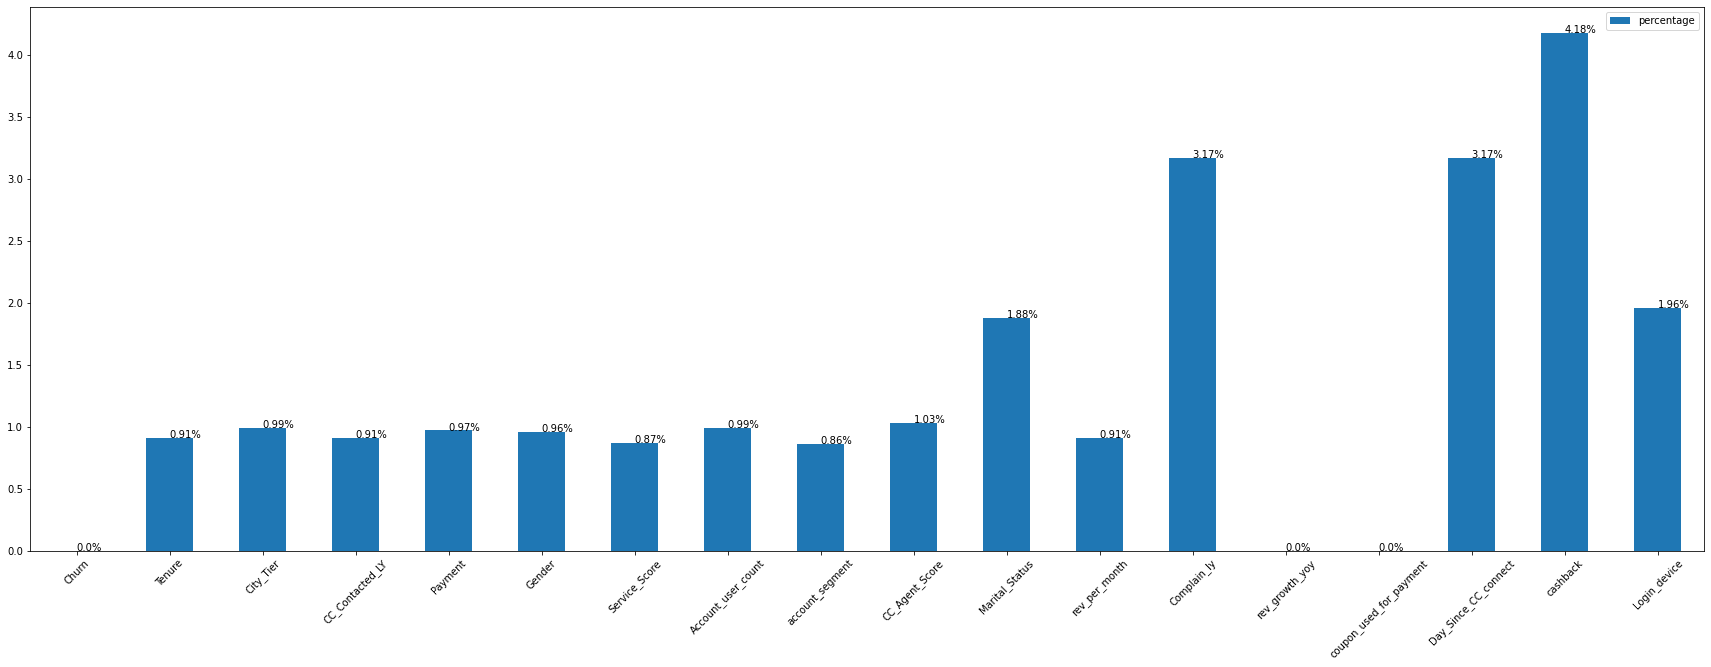

In [47]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe


barchart = missing_df.plot.bar(y='percentage',rot=45,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

In [48]:
df['Tenure'] = df['Tenure'].fillna("No_info")
df['Payment'] = df['Payment'].fillna("No_info")
df['Gender'] = df['Gender'].fillna("No_info")
df['Account_user_count'] = df['Account_user_count'].fillna("No_info")
df['account_segment'] = df['account_segment'].fillna("No_info")
df['Marital_Status'] = df['Marital_Status'].fillna("No_info")
df['rev_per_month'] = df['rev_per_month'].fillna("No_info")
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].fillna("No_info")
df['cashback'] = df['cashback'].fillna("No_info")
df['Login_device'] = df['Login_device'].fillna("No_info")

In [49]:
df['City_Tier'] = df['City_Tier'].fillna(df['City_Tier'].mean())
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].mean())
df['Service_Score'] = df['Service_Score'].fillna(df['Service_Score'].mean())
df['CC_Agent_Score'] = df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mean())
df['Complain_ly'] = df['Complain_ly'].fillna(df['Complain_ly'].mean())

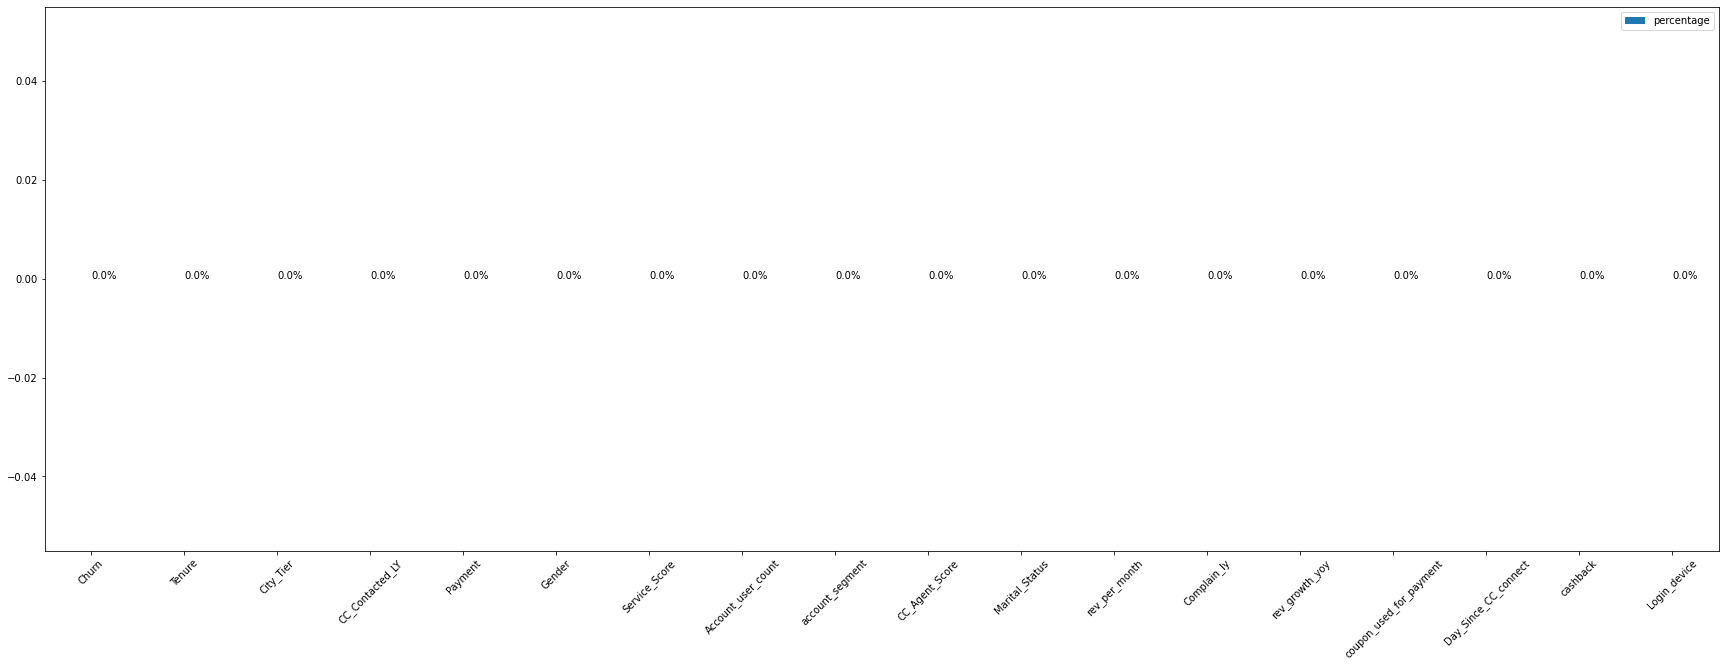

In [51]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=45,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

In [52]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups].head(2)

Number of duplicate rows = 264


,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
1347,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
1395,1,11,1.0,6.0,Debit Card,Male,3.0,4,HNI,3.0,Single,10,1.0,13,0,0,153.81,Mobile


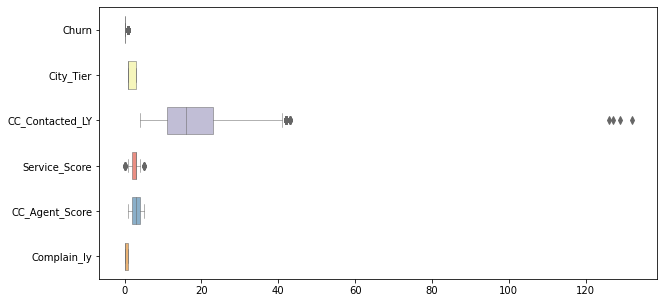

In [53]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

In [54]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [55]:
for feature in df[['CC_Contacted_LY','Service_Score']]:
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

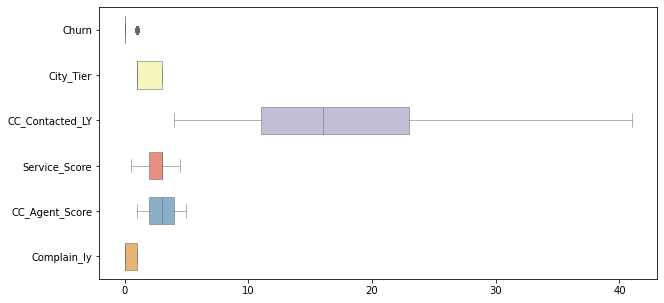

In [56]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

## EDA UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Churn', ylabel='count'>

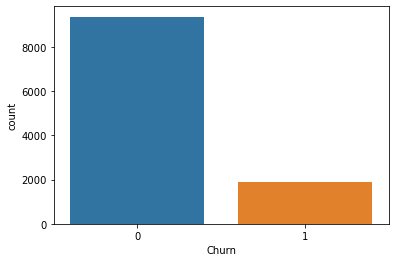

In [13]:
sns.countplot(data=df, x='Churn')

In [16]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [17]:
data = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(data.columns.values)
len(lstnumericcolumns)

7

Description of AccountID
----------------------------------------------------------------------------
count    11260.00000
mean     25629.50000
std       3250.62635
min      20000.00000
25%      22814.75000
50%      25629.50000
75%      28444.25000
max      31259.00000
Name: AccountID, dtype: float64 Distribution of AccountID
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

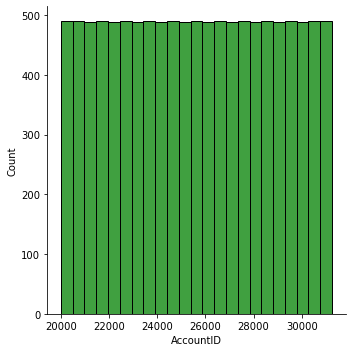

BoxPlot of AccountID
----------------------------------------------------------------------------


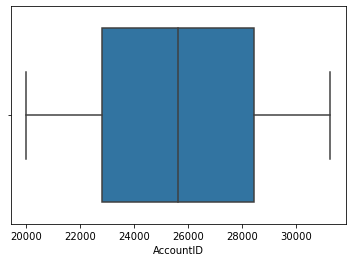

Description of Churn
----------------------------------------------------------------------------
count    11260.000000
mean         0.168384
std          0.374223
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Churn, dtype: float64 Distribution of Churn
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

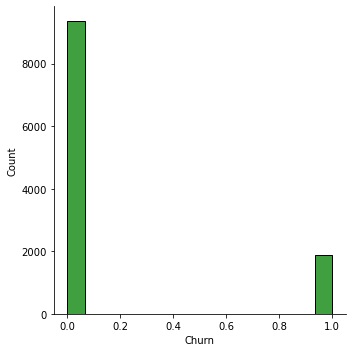

BoxPlot of Churn
----------------------------------------------------------------------------


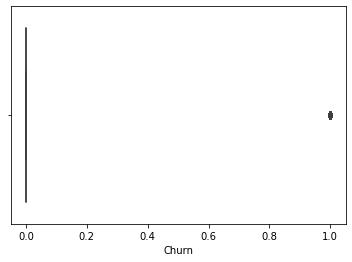

Description of City_Tier
----------------------------------------------------------------------------
count    11148.000000
mean         1.653929
std          0.915015
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: City_Tier, dtype: float64 Distribution of City_Tier
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

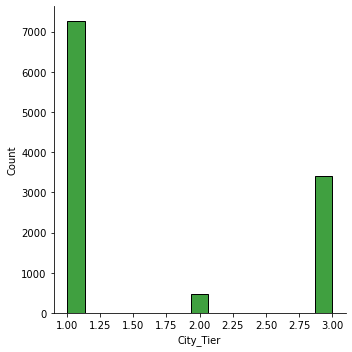

BoxPlot of City_Tier
----------------------------------------------------------------------------


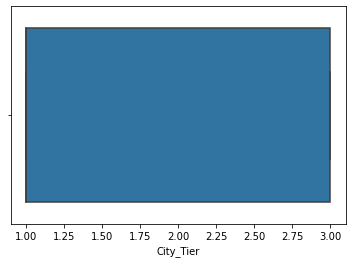

Description of CC_Contacted_LY
----------------------------------------------------------------------------
count    11158.000000
mean        17.867091
std          8.853269
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: CC_Contacted_LY, dtype: float64 Distribution of CC_Contacted_LY
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

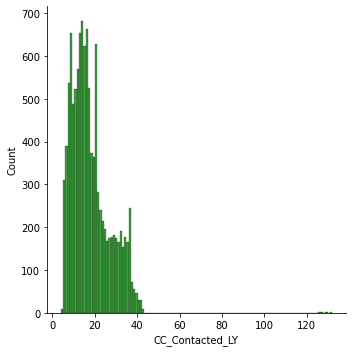

BoxPlot of CC_Contacted_LY
----------------------------------------------------------------------------


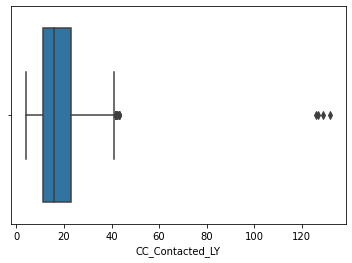

Description of Service_Score
----------------------------------------------------------------------------
count    11162.000000
mean         2.902526
std          0.725584
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Service_Score, dtype: float64 Distribution of Service_Score
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

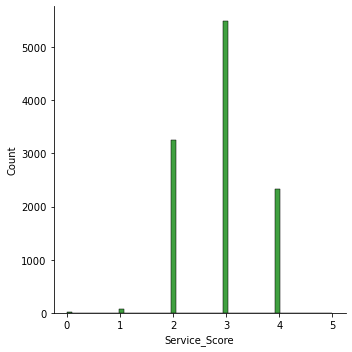

BoxPlot of Service_Score
----------------------------------------------------------------------------


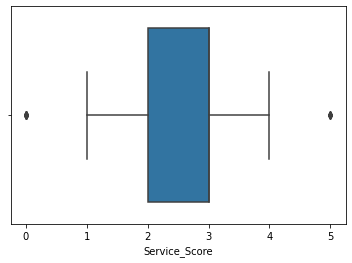

Description of CC_Agent_Score
----------------------------------------------------------------------------
count    11144.000000
mean         3.066493
std          1.379772
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: CC_Agent_Score, dtype: float64 Distribution of CC_Agent_Score
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

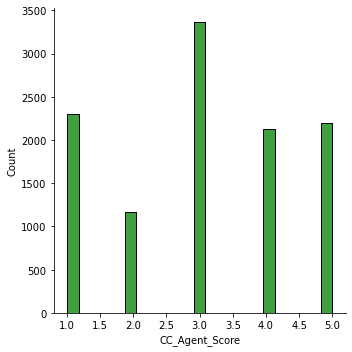

BoxPlot of CC_Agent_Score
----------------------------------------------------------------------------


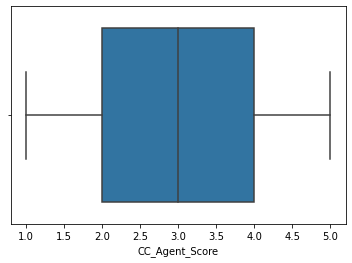

Description of Complain_ly
----------------------------------------------------------------------------
count    10903.000000
mean         0.285334
std          0.451594
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Complain_ly, dtype: float64 Distribution of Complain_ly
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

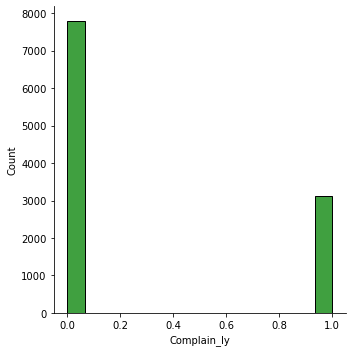

BoxPlot of Complain_ly
----------------------------------------------------------------------------


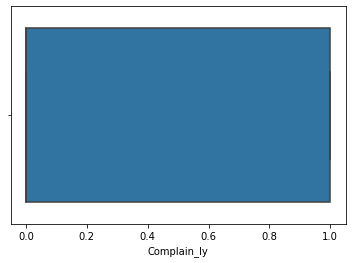

In [18]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

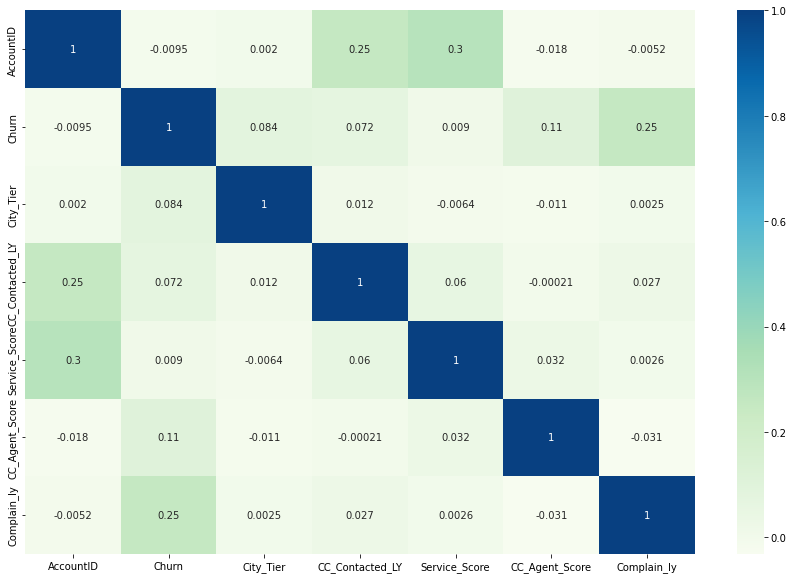

In [33]:
f, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), cmap = 'GnBu', annot = True)

In [34]:
df_cat = df.select_dtypes(['object'])

ValueError: num must be 1 <= num <= 6, not 7

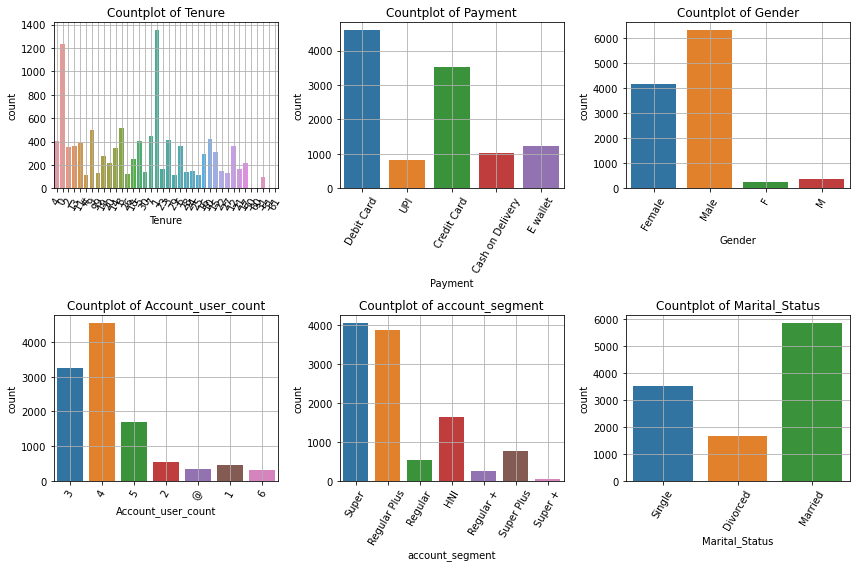

In [37]:
plt.figure(figsize=(12,8))
for i in range(len(df_cat.columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df_cat, x=df_cat.columns[i])
    plt.grid(True)
    plt.xticks(rotation=60)
    plt.title(f'Countplot of {df_cat.columns[i]}')
    plt.tight_layout()
    i+=1

In [51]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print('\n')
        print('feature:', feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Tenure
[4, 0, 2, 13, 11, ..., 50, 60, 31, 51, 61]
Length: 39
Categories (38, object): [0, 1, 2, 3, ..., 60, 61, 99, '#']
[ 4  0  2 13 11 37  9 36 19 20 14  8 26 18  5 30  7  1 23  3 29  6 28 24
 25 16 10 15 22 -1 27 12 21 17 32 34 31 33 35]


feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet', NaN]
Categories (5, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI']
[ 2  4  1  0  3 -1]


feature: Gender
['Female', 'Male', 'F', NaN, 'M']
Categories (4, object): ['F', 'Female', 'M', 'Male']
[ 1  3  0 -1  2]


feature: Account_user_count
[3, 4, NaN, 5, 2, '@', 1, 6]
Categories (7, object): [1, 2, 3, 4, 5, 6, '@']
[ 2  3 -1  4  1  6  0  5]


feature: account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', NaN, 'Super Plus', 'Super +']
Categories (7, object): ['HNI', 'Regular', 'Regular +', 'Regular Plus', 'Super', 'Super +', 'Super Plus']
[ 4  3  1  0  2 -1  6  5]


feature: Marital_Status
['Single', 'Div

In [53]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                        int8
City_Tier                  float64
CC_Contacted_LY            float64
Payment                       int8
Gender                        int8
Service_Score              float64
Account_user_count            int8
account_segment               int8
CC_Agent_Score             float64
Marital_Status                int8
rev_per_month                 int8
Complain_ly                float64
rev_growth_yoy                int8
coupon_used_for_payment       int8
Day_Since_CC_connect          int8
cashback                     int16
Login_device                  int8
dtype: object

In [54]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [57]:
df_impute = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [59]:
df_impute.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [61]:
cc_num = df_impute[['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count',
       'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 
           'Day_Since_CC_connect', 'cashback']]

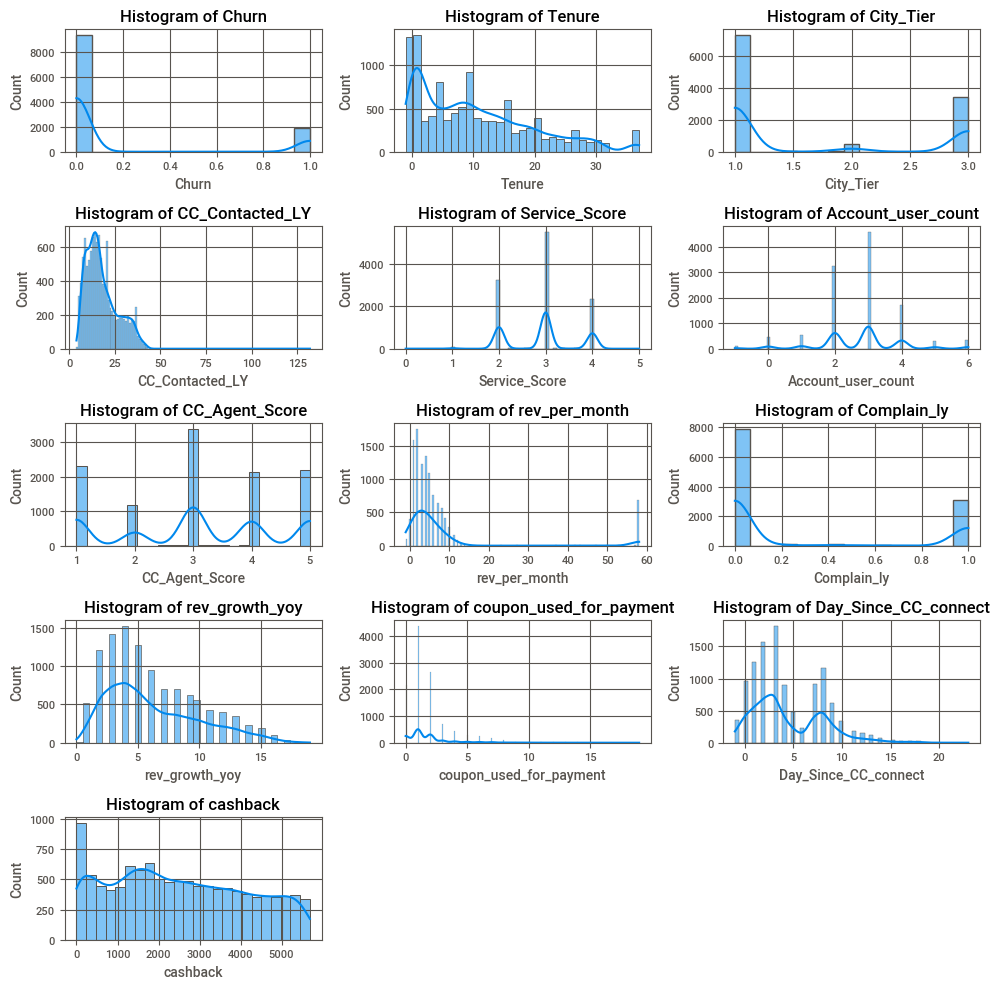

In [69]:
plt.figure(figsize=(10,10))
for i in range(len(cc_num.columns)):
    plt.subplot(5,3,i+1)
    sns.histplot(data=cc_num, x=cc_num.columns[i], kde=True)
    plt.grid(True)
    plt.title(f'Histogram of {cc_num.columns[i]}')
    plt.tight_layout()
    i+=1

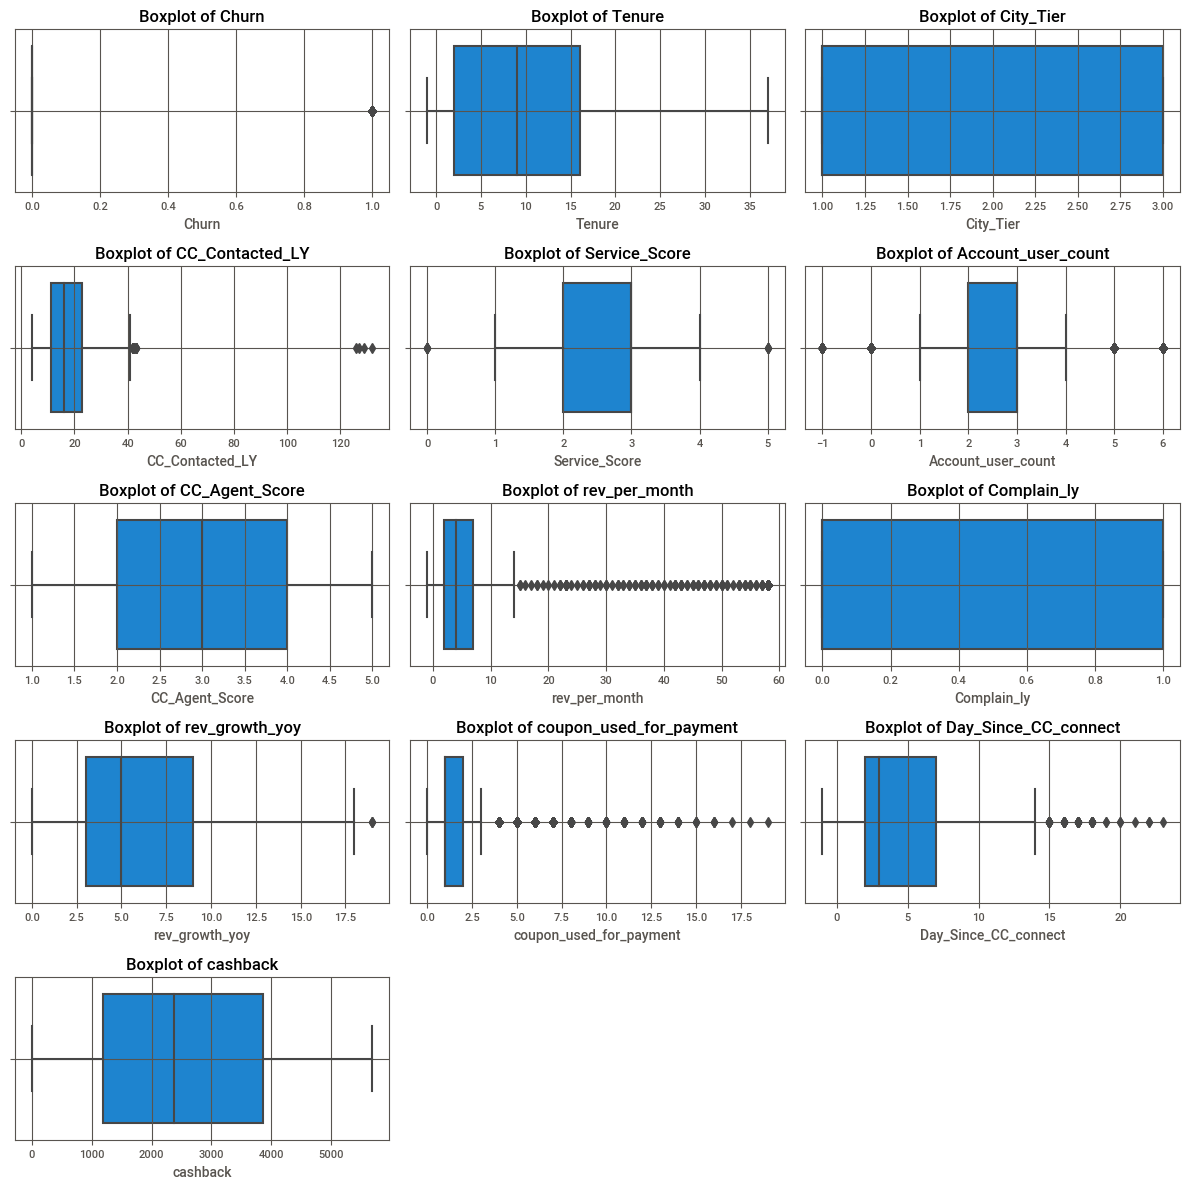

In [70]:
plt.figure(figsize=(12,12))
for i in range(len(cc_num.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(data=cc_num, x=cc_num.columns[i])
    plt.grid(True)
    plt.title(f'Boxplot of {cc_num.columns[i]}')
    plt.tight_layout()
    i+=1

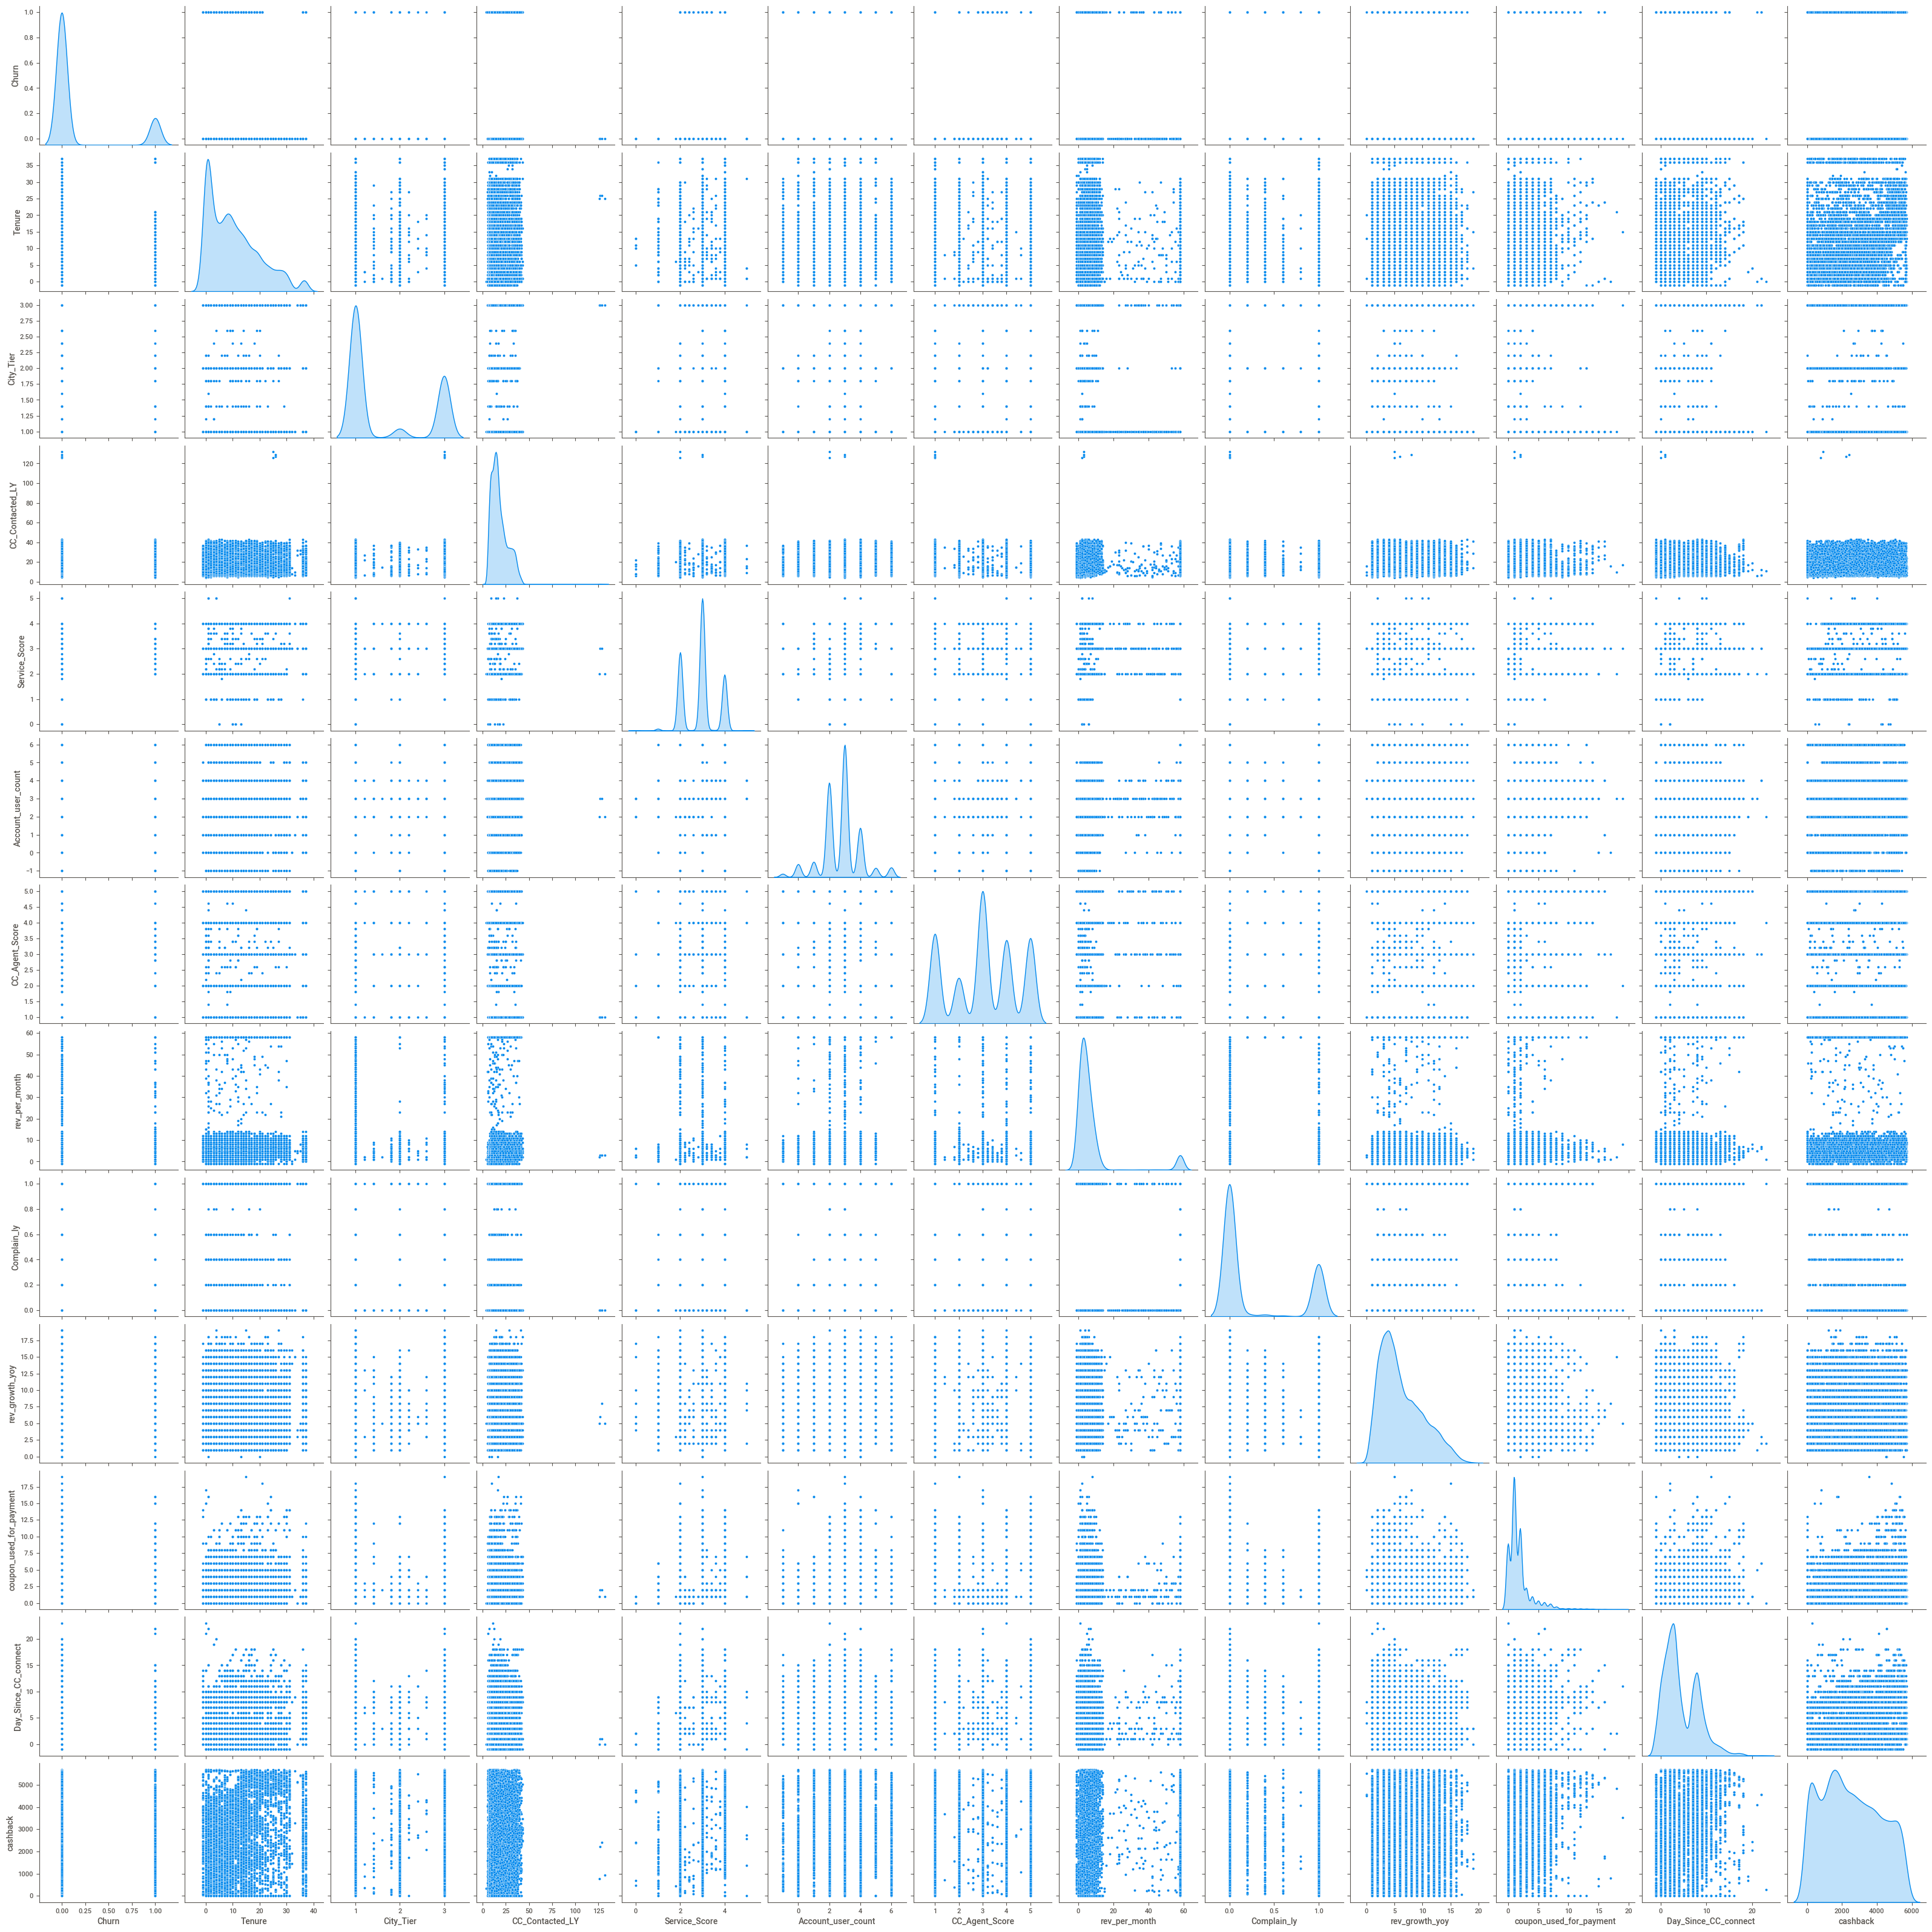

In [71]:
sns.pairplot(data=cc_num, diag_kind='kde');

In [72]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [75]:
lrTenure,urTenure=remove_outlier(df_impute['Tenure'])
df_impute['Tenure']=np.where(df_impute['Tenure']>urTenure,urTenure,df_impute['Tenure'])


lrCC_Contacted_LY,urCC_Contacted_LY=remove_outlier(df_impute['CC_Contacted_LY'])
df_impute['CC_Contacted_LY']=np.where(df_impute['CC_Contacted_LY']>urCC_Contacted_LY,urCC_Contacted_LY,df_impute['CC_Contacted_LY'])


lrrev_per_month,urrev_per_month=remove_outlier(df_impute['rev_per_month'])
df_impute['rev_per_month']=np.where(df_impute['rev_per_month']>urrev_per_month,urrev_per_month,df_impute['rev_per_month'])


lrcoupon_used_for_payment,urcoupon_used_for_payment=remove_outlier(df_impute['coupon_used_for_payment'])
df_impute['coupon_used_for_payment']=np.where(df_impute['coupon_used_for_payment']>urcoupon_used_for_payment,urcoupon_used_for_payment,df_impute['coupon_used_for_payment'])


lrDay_Since_CC_connect,urDay_Since_CC_connect=remove_outlier(df_impute['Day_Since_CC_connect'])
df_impute['Day_Since_CC_connect']=np.where(df_impute['Day_Since_CC_connect']>urDay_Since_CC_connect,urDay_Since_CC_connect,df_impute['Day_Since_CC_connect'])


lrcashback,urcashback=remove_outlier(df_impute['cashback'])
df_impute['cashback']=np.where(df_impute['cashback']>urcashback,urcashback,df_impute['cashback'])
df_impute['cashback']=np.where(df_impute['cashback']<lrcashback,lrcashback,df_impute['cashback'])

In [76]:
selected_cols = df_impute[['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'coupon_used_for_payment', 
                    'Day_Since_CC_connect', 'cashback']]

In [77]:
selected_cols

,Tenure,CC_Contacted_LY,rev_per_month,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,4.0,6.0,8.0,1.0,5.0,2222.0
1,0.0,8.0,6.0,0.0,0.0,109.0
2,0.0,30.0,5.0,0.0,3.0,-1.0
3,0.0,15.0,7.0,0.0,3.0,748.0
4,0.0,12.0,2.0,1.0,3.0,552.0
...,...,...,...,...,...,...
11255,10.0,34.0,8.0,1.0,4.0,1810.0
11256,13.0,19.0,6.0,1.0,8.0,4481.0
11257,1.0,14.0,6.0,1.0,4.0,3680.0
11258,23.0,11.0,6.0,2.0,9.0,3244.0


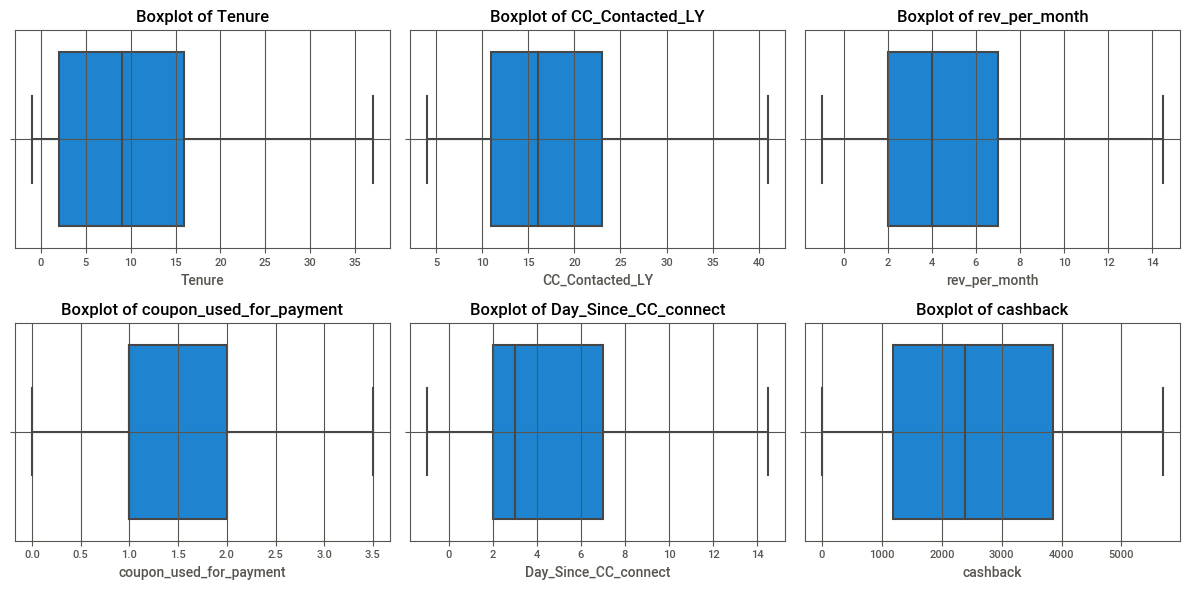

In [78]:
plt.figure(figsize=(12,6))
for i in range(len(selected_cols.columns)):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=selected_cols, x=selected_cols.columns[i])
    plt.grid(True)
    plt.title(f'Boxplot of {selected_cols.columns[i]}')
    plt.tight_layout()
    i+=1

In [80]:
df_impute['Churn'].value_counts(normalize=True)

0.0    0.831616
1.0    0.168384
Name: Churn, dtype: float64